# Import Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Read Dataset

In [6]:
data = pd.read_csv(r'C:\Users\hp\Desktop\2BDA Notes\Practical\BD2P3(Machine Learning 1)\Assignment 02\boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Checking Null Values

In [7]:
# check data type for each column
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
# check total null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# summarize the data type and null values
# just for better visual
data_type = pd.DataFrame(data.dtypes).T.rename({0:'Column Data Type'})
null_value = pd.DataFrame(data.isnull().sum()).T.rename({0:'Null Values'})

# combine the data
data_info = data_type.append(null_value)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# our data has no null values
null_percentage = pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename({0:'Percentage of Null Values'}).round(2)

# combine the data
data_info = data_info.append(null_percentage)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percentage of Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Descriptive Statistics

In [11]:
# descriptive statistics
data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Data Distribution
We can use the histogram to see the data distribution. There are several ways to make a histogram (and others) plot.

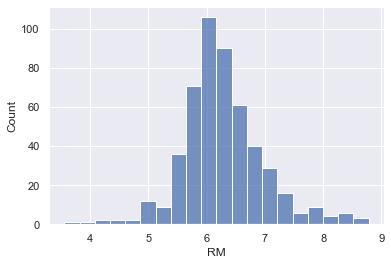

In [12]:
sns.histplot(data=data, x='RM', bins=20)
plt.show()

The distribution of `RM` column is good because it's not skewed.

### Histogram of Data Distribution
A histogram plot is a discrete plot, with some bins to represent the distribution of data.

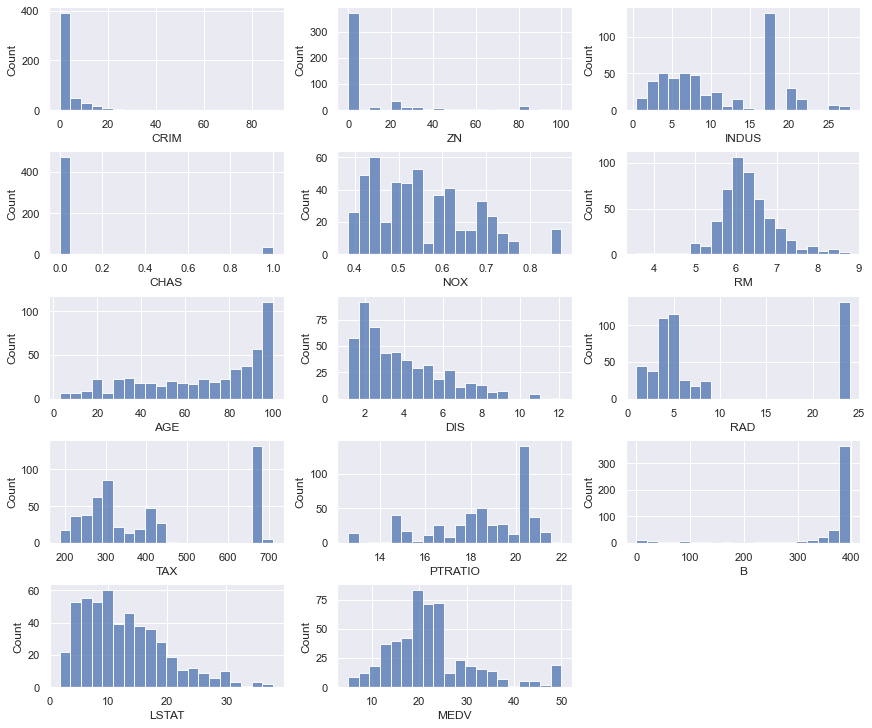

In [13]:
# get all column name
column_list = list(data.columns)

fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
# axes_list = []
# for axes_row in ax:
#     for axes in axes_row:
#         axes_list.append(axes)

# it's the same as the above looping, but in a shorter way
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.histplot(data=data, x=col_name, ax=axes_list[i], bins=20)

# I will hide the last axes since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

### Density of Data Distribution
A density plot is a continuous (smoothed) version of a histogram. Our data is not continuous, there may be some gap between values, So, we need an estimator. The most common form of estimation is kernel density estimation (KDE).

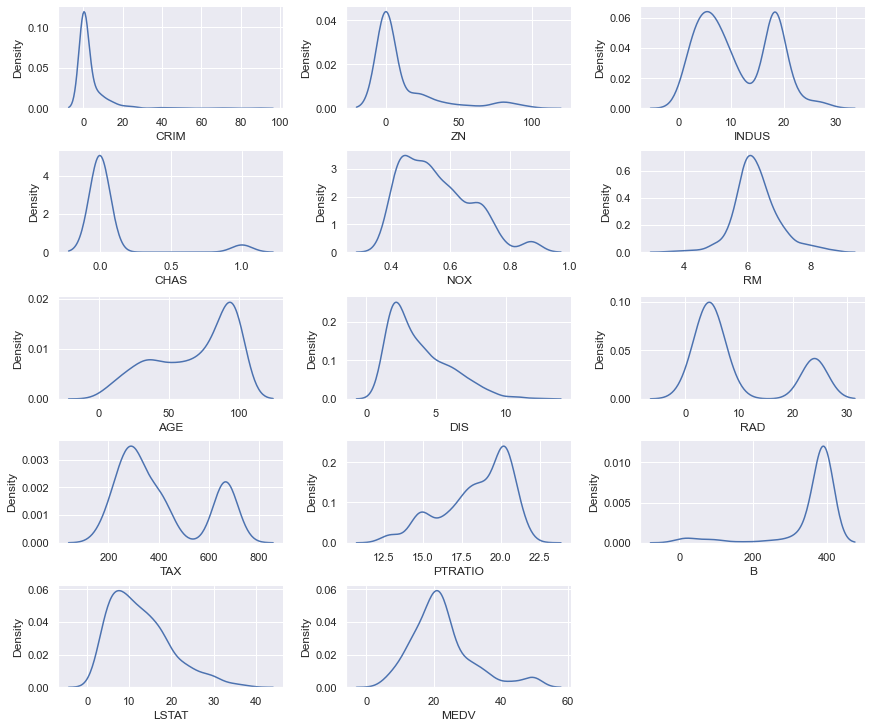

In [14]:
fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.kdeplot(data=data, x=col_name, ax=axes_list[i])

# I will hide the last axes since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

### Histogram and Density
We can combine histogram and density in 1 plot.

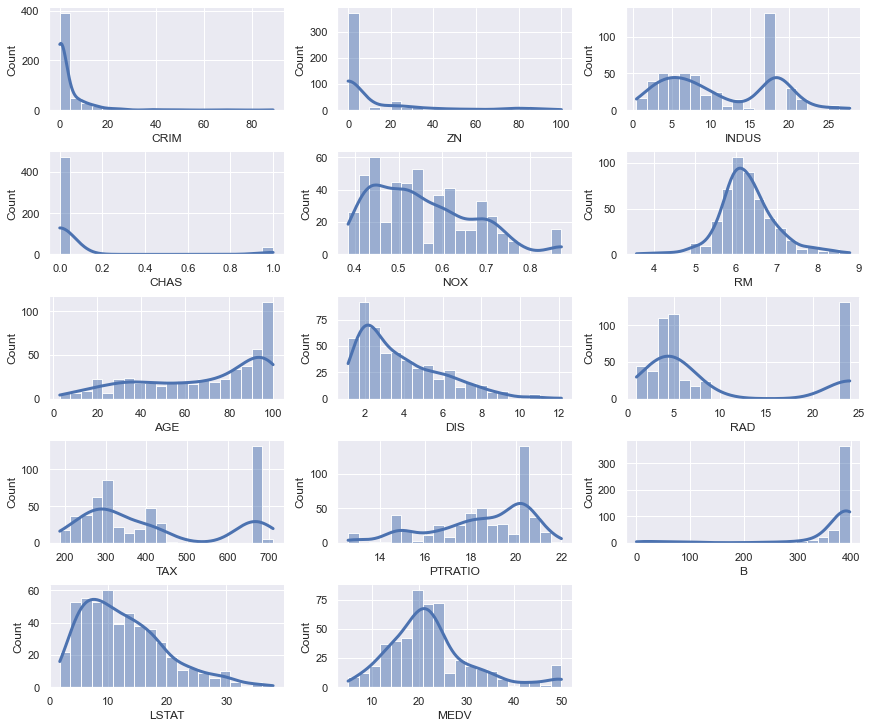

In [15]:
fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.histplot(data=data, x=col_name, ax=axes_list[i], bins=20, kde=True, line_kws={'linewidth':3})

# I will hide the last axes since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

As you can see, some attributes are skewed and not in normal distribution form.

## Handling Skewed Data
Some methods for handling skewed data:
- Log transform
- Square root transform
- Box-cox transform

In [16]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [17]:
# combine with our data previous data info
data_skewness = pd.DataFrame(data.skew()).T.rename({0:'Data Skewness'}).round(2)

data_info = data_info.append(data_skewness)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percentage of Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Data Skewness,5.22,2.23,0.3,3.41,0.73,0.4,-0.6,1.01,1,0.67,-0.8,-2.89,0.91,1.11


We can see that`CRIM` has the largest skewness. Let's fix it.

### Log Transform
We can use Numpy log function to transform our data.

In [18]:
crim_log = np.log(data['CRIM'])
crim_log.skew().round(2)

0.41

Using log transform, we have reduced the `CRIM` skewness. But, how about the distribution of `CRIM` data? Let's visualize it

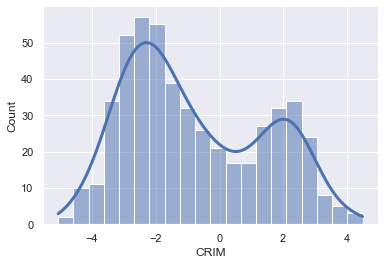

In [19]:
sns.histplot(crim_log, bins=20, kde=True, line_kws={'linewidth':3})
sns.despine()
plt.show()

It's still not in normal distribution form, but it's way much better than before.

### Square Root Transform
Again, we can use Numpy function to transform our data.

In [20]:
crim_sqrt = np.sqrt(data['CRIM'])
crim_sqrt.skew().round(2)

2.02

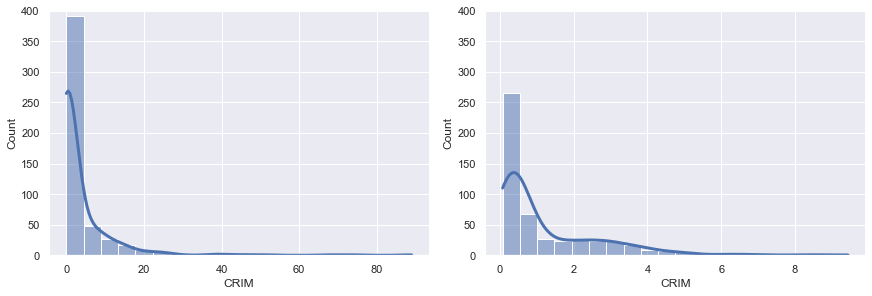

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

sns.histplot(data['CRIM'], bins=20, kde=True, ax=ax[0], line_kws={'linewidth':3})
ax[0].set_ylim(0,400)

sns.histplot(crim_sqrt, bins=20, kde=True, ax=ax[1], line_kws={'linewidth':3})
ax[1].set_ylim(0,400)

sns.despine()
plt.show()

From 5.22 to 2.02, I think it's not a really big difference. And the distribution is almost the same, but the range is smaller.

### Box-Cox Transform
One thing that we have to pay attention to when using this transformation, **your data must be positive**.

We can use Scipy library for this transformation.

In [22]:
from scipy import stats

cal_crim_boxcox = stats.boxcox(data['CRIM'])[0]
# cal_crim_boxcox

Since it returns an array, we need to convert it to Series (or Dataframe) to see the skewness.

In [23]:
crim_boxcox = pd.Series(cal_crim_boxcox)
crim_boxcox.skew().round(2)

0.09

now our skewness is really small. Let's see the data distribution again.

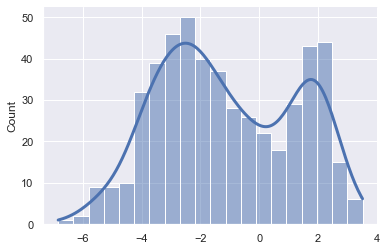

In [24]:
sns.histplot(crim_boxcox, bins=20, kde=True, line_kws={'linewidth':3})
sns.despine()
plt.show()

It has similar distribution with the log transform. But I think it's better since the skewness is lower than using log transform.

## Correlation
- It's used to see the relationship between features
- Correlation value is between -1 to 1
- Correlation value = -1 means negative correlation. If 'X' goes bigger, 'Y' goes smaller
- Correlation value = 1 means positive correlation. If 'X' goes bigger, 'Y' also goes bigger
- Correlation value = 0 means, there's no correlation between 'X' and 'Y'

In [25]:
corr_matrix = data.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Visualization can help us to see correlation more clearly.

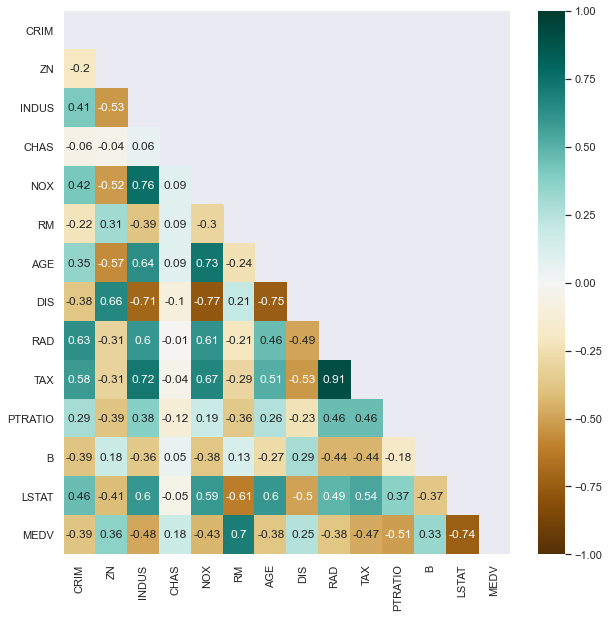

In [26]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

Based on the above correlation plot, we can see that `RM` and `LSTAT` have the highest correlation with `MEDV`. We can use a scatter plot to see the correlation between attributes.

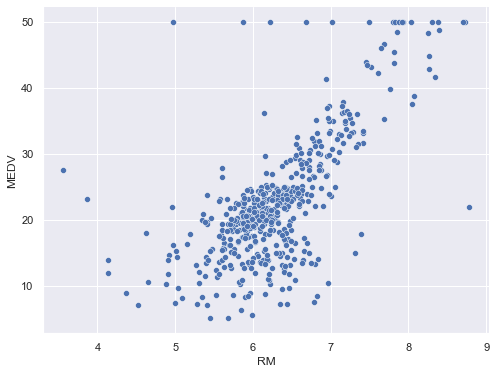

In [27]:
# RM and MEDV

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='RM', y='MEDV')
sns.despine()
plt.show()

From this plot, we can see that `RM` has a positive correlation with `MEDV`, just like the correlation heatmap above.

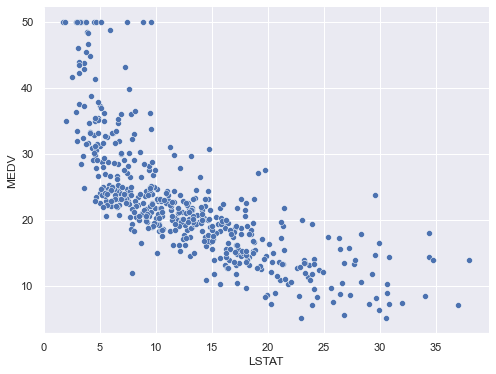

In [28]:
# LSTAT and MEDV

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='LSTAT', y='MEDV')
sns.despine()
plt.show()

From this plot, we can see that `LSTAT` has a negative correlation with `MEDV`, just like the correlation heatmap above.